In [ ]:
import sys
sys.path.append('/home/kal/TF_models/bin/')
import numpy as np
import matplotlib.pyplot as plt
import eval_TFmodel
import sequence
import train_TFmodel
import viz_sequence
import helper
import seq_only_gen
from keras import backend as K

In [ ]:
# get the generator
gen = seq_only_gen.CTCFGenerator('/home/kal/TF_models/seq_only/ctcfgen.hdf5')
g = gen.pos_gen()
#load a model
reg = eval_TFmodel.TFmodel('/home/kal/TF_models/seq_only/seq_regression/20170920_regression_model/')
sig = eval_TFmodel.TFmodel('/home/kal/TF_models/seq_only/seq_classifier/20170919_sigmoid_model/')
rev = eval_TFmodel.TFmodel('/home/kal/TF_models/seq_only/seq_classifier/20180124_162919_convnet/')
pwm = eval_TFmodel.TFmodel('/home/kal/TF_models/seq_only/seq_classifier/pwm_model/')
# load a sequence
seq = sequence.Sequence(next(g)[0])
print(reg.model.predict(train_TFmodel.blank_batch(seq.seq))[0][0])
print(reg.layer_dict.keys())

In [ ]:
temp = .1
print(pwm.layer_dict['conv1d_1'].get_weights()[0].shape)
kernel = sequence.Sequence(pwm.layer_dict['conv1d_1'].get_weights()[0].reshape((-1, 4)))
kernel.logo()
viz_sequence.plot_icweights(helper.softmax(kernel.seq/temp*np.amax(kernel.seq)))

In [ ]:
# plot weights from first layer neurons
temp = .005
weight_array = rev.layer_dict['conv1d_1'].get_weights()[0]
for idx in range(weight_array.shape[2]):
    weight = weight_array[:,:,idx]
    kernel = sequence.Sequence(weight)
    viz_sequence.plot_icweights(helper.softmax(kernel.seq/temp*np.amax(kernel.seq)))

In [45]:
#get a general dream
#dream = reg.gumbel_dream(seq, 'standard')
# or get a mystery motif?!?!
meme = sequence.CTCF_memes[0].seq
dream = sequence.SeqDist(train_TFmodel.random_seq().seq)
dream.seq[100:100+meme.shape[0]] = meme
meme = sequence.mystery_memes[0].seq
dream.seq[115:115+meme.shape[0]] = meme

/home/kal/TF_models/bin/sequence.py:243: RuntimeWarning: divide by zero encountered in log
  self.seq = helper.softmax(np.log(distribution))


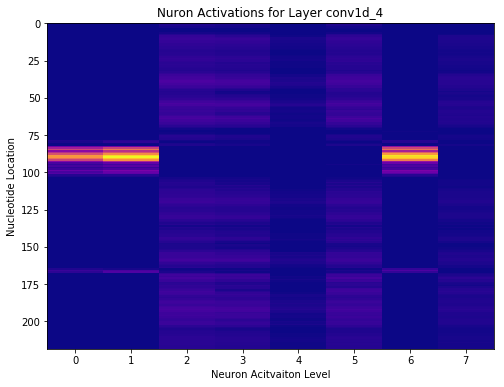

In [46]:
layer_name = 'conv1d_4'

# get the activation for that dream
in_seqs = reg.model.input
layer_act = K.function([in_seqs, K.learning_phase()], [reg.layer_dict[layer_name].output])
activations = layer_act([train_TFmodel.blank_batch(dream.discrete_seq()), 0])[0][0]
plt.figure(figsize=(8,6))
plt.xlabel('Neuron Acitvaiton Level')
plt.ylabel('Nucleotide Location')
plt.title('Nuron Activations for Layer ' + layer_name)
plt.imshow(activations, aspect='auto', cmap='plasma')
plt.show()

In [ ]:

for i in range(8):
    dream = reg.gumbel_dream(seq, 'standard', viz=False, layer_name='conv1d_4', filter_index=i)
    reg.get_importance(dream, viz=True)